#            Lab 04

## California House Price Prediction

### Bàu tập 1

In [2]:
#import thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("./housing.csv")

In [3]:
#10 du lieu dau tien cua bo data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


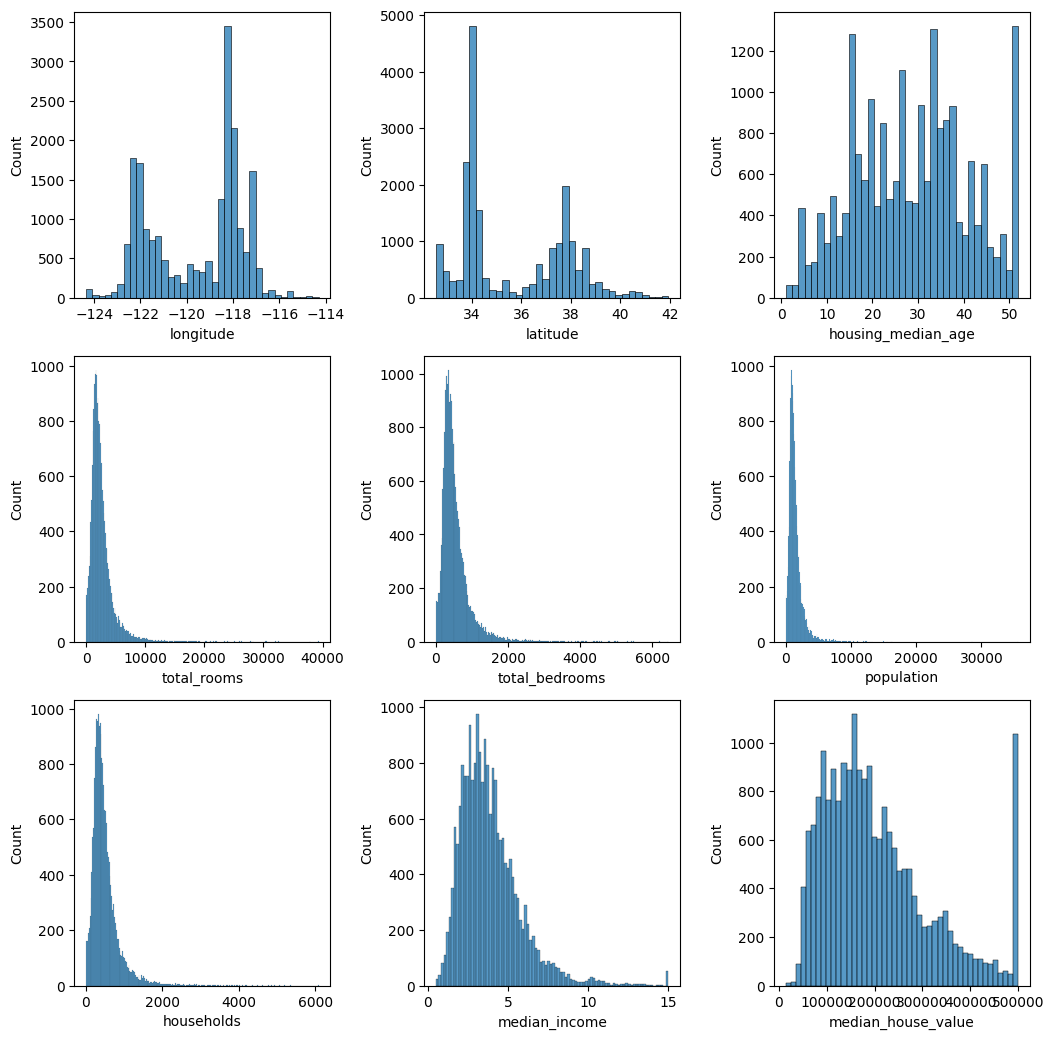

In [4]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
# Vẽ histplot cho các thuộc tính numerical
n_rows=3
n_cols=3

fig,ax=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))#tạo subplot cho các cột
 #vong for ve cho 9 box
for r in range (0,n_rows):
    for c in range (0,n_cols):
        i=(r*n_cols)+c;
        if i < len(columns):
            ax_i=ax[r,c]
            sns.histplot(data=df[columns[i]],ax=ax_i)

plt.tight_layout() #dãn cách tiêu đề 



In [5]:
print(f"Min = ",df['median_house_value'].min())
print(f"Số lượng nhà có giá trị min: ",df['median_house_value'].value_counts()[df['median_house_value'].min()])
print(f"Max = ",df['median_house_value'].max())
print(f"Số lượng nhà có giá trị max: ",df['median_house_value'].value_counts()[df['median_house_value'].max()])

Min =  14999.0
Số lượng nhà có giá trị min:  4
Max =  500001.0
Số lượng nhà có giá trị max:  965


In [6]:
columns = df.columns
num_columns = len(df.columns)
print(f"Số lượng columns: ",num_columns)
print(df.columns)

Số lượng columns:  10
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [7]:
#các columns của dataset
for col in columns:
    print(col)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


In [8]:
# hàm tìm những cột bị thiếu dữ liệu trong columns
def display_missing_data(df,columns):
    n_rows=df.shape[0]
    for col in columns:
        missing_count=df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values")
display_missing_data(df,columns)

total_bedrooms has 1.00% missing values


In [9]:
# Fill những dữ liệu thiếu bằng phương pháp median()
df['total_bedrooms']= df['total_bedrooms'].fillna(df['total_bedrooms'].median())
display_missing_data(df,columns)

In [10]:

df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### Transform data ocean_proximity 
- 0: <1H OCEAN - means less than one hour to sea
- 1: INLAND
- 2: ISLAND
- 3: NEAR BAY
- 4: NEAR OCEAN

In [11]:
# Dùng LabelEncoder để transform cột ocean_proximity
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])
df['ocean_proximity'].value_counts()

ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64

<Axes: >

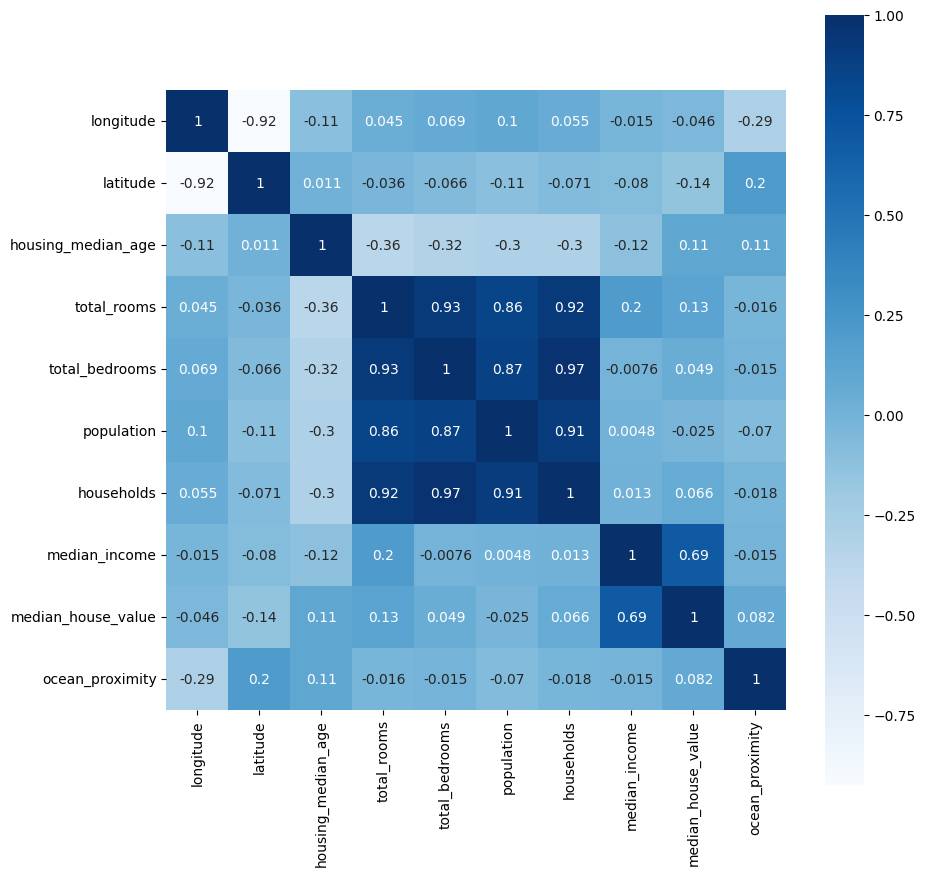

In [12]:
# Tinh su phu thuoc cua tung thuoc tinh
correlation = df.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

In [13]:
data_visualize = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")
X = df['median_income']
y = df['median_house_value']

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Xem số chiều của tập huấn luyện và tập kiểm thử
print(f"Số chiều của tập huấn luyện: {X_train.shape}")
print(f"Số chiều của tập kiểm thử: {X_test.shape}")
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

Số chiều của tập huấn luyện: (16512,)
Số chiều của tập kiểm thử: (4128,)


In [ ]:
#Dùng min max scaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [ ]:
#Cau 6
#Dùng LinearRegression để dự đoán
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train_transformed)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([35.1768466 , 18.32460445, 52.79118058, ..., 22.70106971,
       28.36020412, 22.9907944 ])

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_transformed, y_pred, squared = True)
print(f"MSE cho lần train này là: {round(MSE,4)}")


MSE cho lần train này là: 47643470415.2776


<Axes: xlabel='median_income', ylabel='median_house_value'>

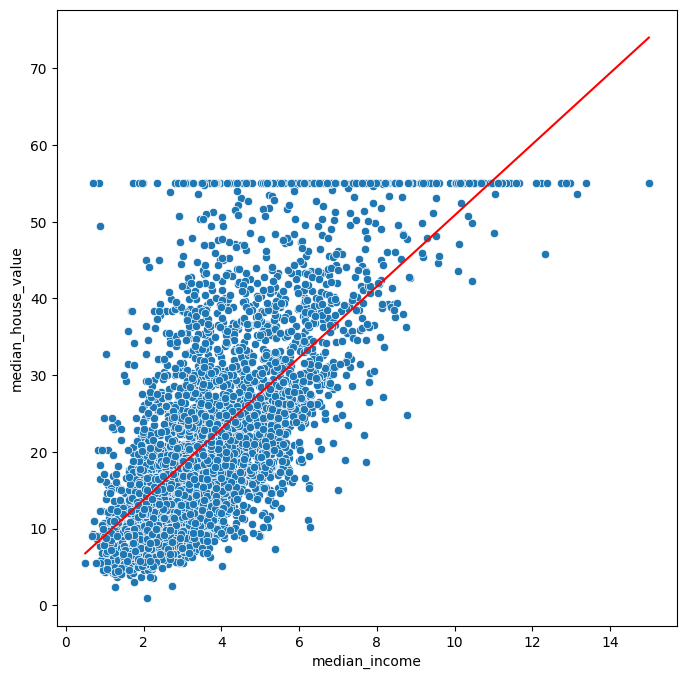

In [ ]:
import seaborn as sns
test_true = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value",color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")


In [ ]:
#Sử dụng ShuffleSplit để áp dụng CV 
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X, y):
    x_train = X.iloc[train_index]
    x_train = x_train.values.reshape(-1,1)
    y_train = y.iloc[train_index]
    y_train = y_train.values.reshape(-1,1).reshape(-1)
    
    x_test = X.iloc[test_index]
    x_test = x_test.values.reshape(-1,1)
    y_test = y.iloc[test_index]
    y_test = y_test.values.reshape(-1,1).reshape(-1)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result = mean_squared_error(y_test_transformed, y_pred, squared=True)
    avg_mse.append(result)
for avg in avg_mse:
    print(avg)
avg = np.mean(np.array(avg_mse))
print(f"MSE trung binh la: {avg}")

48272469938.787476
48651042531.60488
49368595728.513855
49093698327.89851
48802538826.74345
48456614892.94649
48791527678.67154
49194460165.76958
48347207521.3441
47643470415.27765
MSE trung binh la: 48662162602.75575


### Bài tập 2

In [ ]:
# Tạo X, y để mô hình học và dự đoán, thuộc tính chính để dự đoán là  total_bedroom
X_2 = df['total_bedrooms']
y_2 = df['median_house_value']

from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2)

X_train2 = X_train2.values.reshape(-1,1)
X_test2 = X_test2.values.reshape(-1,1)

#Dùng min max scaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed_2 = sc.fit_transform(y_train2.values.reshape(-1,1)).reshape(-1)
y_test_transformed_2 = sc.fit_transform(y_test2.values.reshape(-1,1)).reshape(-1)

#Dùng LinearRegression để dự đoán
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train2, y_train_transformed_2)

y_pred_r = model.predict(X_test2)
y_pred_r

array([21.94224188, 22.65604839, 22.06606546, ..., 21.95098237,
       22.20008627, 22.47249814])

In [ ]:
MSE_2 = mean_squared_error(y_test, y_pred_r,squared=True)

print(f"MSE của train bằng total_bedrooms vs median_house_values:\n {MSE_2} vs {MSE}")
print(f"Sự chênh lệch của 2 MSE: {MSE - MSE_2}")

MSE của train bằng total_bedrooms vs median_house_values:
 55661814784.317116 vs 47643470415.27765
Sự chênh lệch của 2 MSE: -8018344369.039467


Từ sự chênh lệch trên, có thể thấy việc train bằng total_bedrooms cho ra kết quả tệ hơn so với train bằng median_income
